In [35]:
import numpy as np
import gate_operations as go
import qutip as qt
import random
from functools import reduce

# Visualized Single Qubit Transformations



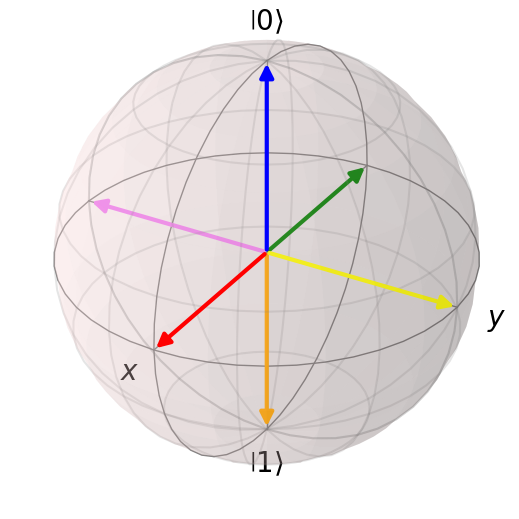

In [36]:
# INPUT SPACE
state = np.array([1,0])

assure_normalization = True




# create plot
bloch_sphere = qt.Bloch()

if assure_normalization:
    state = go.normalization_check(state)

# SEQUENCE
go.plot_bloch_state(state, bloch_sphere, "blue")

state = go.gate_operation(state, go.H())

go.plot_bloch_state(state, bloch_sphere, "red")

state = go.gate_operation(state, go.R_z(np.pi/2))
state = go.gate_operation(state, go.R_x(np.pi))

go.plot_bloch_state(state, bloch_sphere, "violet")

state = go.gate_operation(state, go.R_x(np.pi/2))
state = go.gate_operation(state, go.R_y(np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "green")

state = go.gate_operation(state, go.R_z(-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "yellow")

state = go.gate_operation(state, go.R(np.array([1,0,0]),-np.pi/2))

go.plot_bloch_state(state, bloch_sphere, "orange")




bloch_sphere.show()


# Generating specific states

### Bell states

$\begin{aligned}
    \ket{\Phi^+} &= \frac{\ket{00} + \ket{11}}{\sqrt{2}} \ \ \ \ \ \ket{\Phi^-} &= \frac{\ket{00} - \ket{11}}{\sqrt{2}} \\[8pt]
    \ket{\Psi^+} &= \frac{\ket{01} + \ket{10}}{\sqrt{2}} \ \ \ \ \ \ket{\Psi^-} &= \frac{\ket{01} - \ket{10}}{\sqrt{2}} \\
\end{aligned}$

In [37]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 2, 1)
CNOT12 = go.CNOT(2,1,2)
X1 = go.single_qubit_gate_to_full_gate(go.X(), 2, 1)
X2 = go.single_qubit_gate_to_full_gate(go.X(), 2, 2)

phi_plus  = np.array([1,0,0,0])
phi_plus = go.gate_operation(phi_plus, H1)
phi_plus = go.gate_operation(phi_plus, CNOT12)

print("Phi+ = " + str(phi_plus))

phi_minus  = np.array([1,0,0,0])
phi_minus = go.gate_operation(phi_minus, X1)
phi_minus = go.gate_operation(phi_minus, H1)
phi_minus = go.gate_operation(phi_minus, CNOT12)

print("Phi- = " + str(phi_minus))

psi_plus  = np.array([1,0,0,0])
psi_plus = go.gate_operation(psi_plus, X2)
psi_plus = go.gate_operation(psi_plus, H1)
psi_plus = go.gate_operation(psi_plus, CNOT12)

print("Psi+ = " + str(psi_plus))

psi_minus  = np.array([1,0,0,0])
psi_minus = go.gate_operation(psi_minus, X1)
psi_minus = go.gate_operation(psi_minus, X2)
psi_minus = go.gate_operation(psi_minus, H1)
psi_minus = go.gate_operation(psi_minus, CNOT12)

print("Psi+ = " + str(psi_minus))



Phi+ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
Phi- = [ 0.70710678+0.j  0.        +0.j  0.        +0.j -0.70710678+0.j]
Psi+ = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
Psi+ = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j  0.        +0.j]


### Greenberger–Horne–Zeilinger state

$\ket{\text{GHZ}} = \frac{\ket{000} + \ket{111}}{\sqrt{2}}$

In [38]:
# Gates
H1 = go.single_qubit_gate_to_full_gate(go.H(), 3, 1)
CNOT12 = go.CNOT(3,1,2)
CNOT23 = go.CNOT(3,2,3)

GHZ = np.zeros((2**3,))
GHZ[0] = 1

GHZ = go.gate_operation(GHZ, H1)
GHZ = go.gate_operation(GHZ, CNOT12)
GHZ = go.gate_operation(GHZ, CNOT23)

print("GHZ = " + str(GHZ))

GHZ = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


# Instructional Syntax

### Single Instruction

In [39]:
state = np.array([2,4,3,0.1])
state = go.normalization_check(state)

instruction = go.instruction()

instruction.gate = "CNOT"
instruction.qubit = [1,2]

state1 = go.gate_operation(state, go.CNOT(2,1,2))
state2 = go.apply_instruction(state, instruction, 2)

print(state1)
print(state2)

[0.37132666 0.74265332 0.01856633 0.55698999]
[0.37132666 0.74265332 0.01856633 0.55698999]


### Instruction List

In [40]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate = go.single_qubit_gate_to_full_gate(go.H(),2,1)
instruction = ["H",[1]]

state1 = go.gate_operation(state, gate)
state2 = go.apply_instruction_list(state, instruction, 2)

print(state1)
print(state2)

[0.85927672+0.j 0.39664591+0.j 0.10907193+0.j 0.30400468+0.j]
[0.85927672+0.j 0.39664591+0.j 0.10907193+0.j 0.30400468+0.j]


In [41]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

gate1 = go.single_qubit_gate_to_full_gate(go.H(),2,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),2,2)
instructions = [["H",[1]],["X",[2]]]

state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state2 = reduce(go.apply_instruction_list, instructions, state)

print(state1)
print(state2)

[ 0.58580211+0.j  0.60555308+0.j -0.13345264+0.j -0.52185414+0.j]
[ 0.58580211+0.j  0.60555308+0.j -0.13345264+0.j -0.52185414+0.j]


In [ ]:
state = np.array([random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1),random.uniform(0,1)])
state = go.normalization_check(state)

# Computation with direct gate functions
gate1 = go.single_qubit_gate_to_full_gate(go.H(),3,1)
gate2 = go.single_qubit_gate_to_full_gate(go.X(),3,2)
gate3 = go.single_qubit_gate_to_full_gate(go.R_x(np.pi),3,2)
gate4 = go.CNOT(3,2,1)
gate5 = go.single_qubit_gate_to_full_gate(go.R(np.array([0,1,0]),np.pi),3,3)
gate6 = go.single_qubit_gate_to_full_gate(go.T(),3,1)
gate7 = go.single_qubit_gate_to_full_gate(go.T(),3,2)
gate8 = go.single_qubit_gate_to_full_gate(go.T(),3,3)

state1 = go.gate_operation(state, gate1)
state1 = go.gate_operation(state1, gate2)
state1 = go.gate_operation(state1, gate3)
state1 = go.gate_operation(state1, gate4)
state1 = go.gate_operation(state1, gate5)
state1 = go.gate_operation(state1, gate6)
state1 = go.gate_operation(state1, gate7)
state1 = go.gate_operation(state1, gate8)


# Computation with instruction list
instructions = [["H",[1]],
                ["X",[2]],
                ["Rx",[2],np.pi],
                ["CNOT",[2,1]],
                ["R",[3],np.pi,np.array([0,1,0])],
                ["T",[1,2,3]]]

state2 = reduce(go.apply_instruction_list, instructions, state)

print(state1)
print(state2)

print("Are they the same?")
print(np.allclose(state1,state2))

[-9.33831094e-18+6.48301157e-01j  3.13133255e-01-3.13133255e-01j
  5.03772236e-02-5.03772236e-02j  4.57686855e-02-1.04083409e-17j
 -1.11552298e-02+1.11552298e-02j -1.33228505e-01+0.00000000e+00j
 -1.52506191e-01-4.16333634e-17j  4.09373537e-01+4.09373537e-01j]
[-9.33831094e-18+6.48301157e-01j  3.13133255e-01-3.13133255e-01j
  5.03772236e-02-5.03772236e-02j  4.57686855e-02-6.20520801e-18j
 -1.11552298e-02+1.11552298e-02j -1.33228505e-01-2.88156597e-18j
 -1.52506191e-01-4.62035539e-17j  4.09373537e-01+4.09373537e-01j]
Are they the same?
True
